# Actividad 02: Librerias y modelamiento básico

### Profesor: Juan Marcos Marín Ramírez
#### Métodos Computacionales
---



## 1.
Una persona conduce una moto con rapidez constante $v_m$, mientras que un policia lo hace con aceleración constante $a_p$ (iniciando desde el reposo). Suponga que ambos movimientos inician en $t=0$, haga una gráfica para el movimiento de la moto y del policia, donde el usuario ingrese la velocidad (moto) y aceleración (policia). Además determine el instante $t$ en el cual se encuentran ambos. Ambos movimientos iniciarán en $x_i = 0$

**Pruebe**: para $v_m$ = 15m/s y $a_p$ = 3 m/s², el tiempo deberia ser 10 s


$$x_f = x_i + v_m\cdot t$$

$$x_f = x_i + v_o\cdot t + \frac{1}{2}a_p\cdot t^2$$



Ingrese la velocidad constante de la moto: 15
Ingrese la aceleración constante del policía: 3
El tiempo de encuentro es: 10.0 s


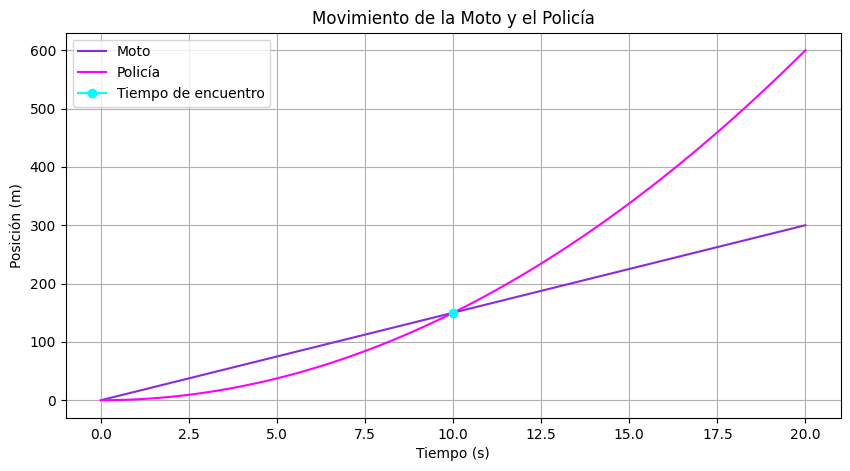

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
v_m = float(input("Ingrese la velocidad constante de la moto: "))
a_p = float(input("Ingrese la aceleración constante del policía: "))
x_i = 0
t_i = 0
t = np.linspace(t_i, 20, 100)
x_m = v_m * t  # x_i = 0
x_p = 0.5 * a_p * t**2  # x_i y v_0 = 0
t_encuentro = 2 * v_m / a_p #igualando x_m y x_p
print('El tiempo de encuentro es:', t_encuentro,'s')


plt.figure(figsize=(10, 5))
plt.plot(t, x_m, label='Moto', color='blueviolet')
plt.plot(t, x_p, label='Policía', color='magenta')
plt.plot(t_encuentro, t_encuentro*v_m, color='cyan', marker='o', label='Tiempo de encuentro') #graficar el puntico de encuentro
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición (m)')
plt.title('Movimiento de la Moto y el Policía')
plt.grid()
plt.legend()
plt.show()


---

##2.
El potencial Lennard-Jones es un modelo simple que aproxima la interacción entre un par de moléculas neutras. Este está definido como:

$$
V(r) = 4\epsilon \left[ \left( \frac{\sigma}{r} \right)^{12} - \left( \frac{\sigma}{r} \right)^{6} \right]
$$

Donde:
- $V(r)$ es el potencial en función de la distancia interatómica $r$.
- $\epsilon$ es la profundidad del pozo de potencial, es decir, la energía mínima que describe la interacción entre dos partículas.
- $\sigma$ es la distancia a la cual el potencial es cero, también conocido como el parámetro de distancia.
- $r$ es la distancia entre las dos partículas.

a. Escriba una función para encontrar modelar el potencial LJ.


b. Usando $\sigma = \epsilon = 1$ demuestre que la distancia de equilibrio $r_m$ es aproximadamente $r_m = 2^{1/6}\sigma$. Para esto realice un gráfico del potencial, especificando los ejes. Trunque la serie en $r_c = 2.5\sigma$.


c. Verifique que $r_m = 2^{1/6}\sigma$ se cumple para diferentes valores de $\sigma$, dejando $\epsilon$ constante.




r_m=1.122462048309373
r_m_obtenido=1.121212121212121


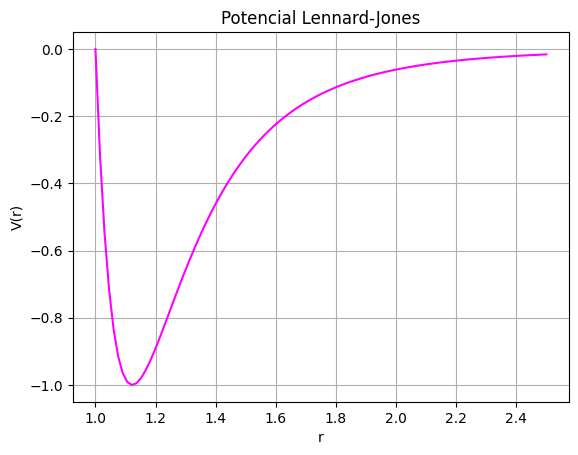

Para sigma = 1.0
  r_m (obtenido) = 1.120603015075377
  r_m (teórico)  = 1.122462048309373

Para sigma = 1.5
  r_m (obtenido) = 1.6809045226130652
  r_m (teórico)  = 1.6836930724640595

Para sigma = 2.0
  r_m (obtenido) = 2.241206030150754
  r_m (teórico)  = 2.244924096618746

Para sigma = 2.5
  r_m (obtenido) = 2.801507537688442
  r_m (teórico)  = 2.8061551207734325



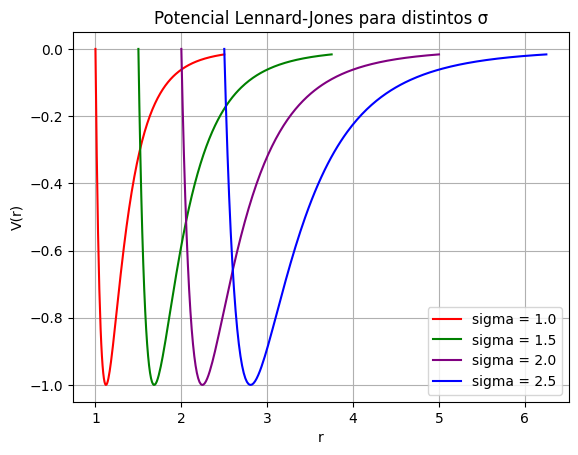

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#a
def L_j(epsilon, sigma, r):
   return 4*epsilon*(((sigma/r)**12)-((sigma/r)**6))

#b
sigma = 1
epsilon = 1
r_c = 2.5 * sigma
r = np.linspace(1, r_c, 100)
V = L_j(epsilon, sigma, r)
minimo = np.argmin(V)
print(f'r_m={2**(1/6)*sigma}')
print(f'r_m_obtenido={r[minimo]}')

plt.plot(r, V, color = 'magenta')
plt.xlabel('r')
plt.ylabel('V(r)')
plt.title('Potencial Lennard-Jones')
plt.grid(True)
plt.show()

#c
epsilon = 1 #epsilon cte.
sigmas = [1.0, 1.5, 2.0, 2.5]
colores = ['red', 'green', 'purple', 'blue']

plt.figure()

for i, sigma in enumerate(sigmas):  # Iteramos sobre cada valor de sigma para que se realice a cada valor
    r = np.linspace(1*sigma, 2.5*sigma, 200)
    V = L_j(epsilon, sigma, r)
    minimo = np.argmin(V)
    r_m_obtenido = r[minimo]
    r_m = 2**(1/6)*sigma

    print("Para sigma =", sigma)
    print("  r_m (obtenido) =", r_m_obtenido)
    print("  r_m (teórico)  =", r_m)
    print()

    plt.plot(r, V, label='sigma = ' + str(sigma), color=colores[i]) # Graficamos la curva del potencial para cada sigma


plt.xlabel('r')
plt.ylabel('V(r)')
plt.title('Potencial Lennard-Jones para distintos σ')
plt.grid()
plt.legend()
plt.show()

##3.  
El siguiente código exporta tablas html de sitios web

```python
import pandas as pd

# Dataset 1
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-height-by-country"

# Read the HTML content
html_content = pd.read_html(url)

alturas = html_content[0]

# Dataset 2
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-net-worth-by-country"

# Read the HTML content
html_content = pd.read_html(url)

income = html_content[0]
````

El primer dataset muestra las alturas medias de niñ@s de 5, 10, 15 y 19 años.

a. Limpie los datos, eliminando columnas en *(in)* y cambie todos los nombres de las columnas al español.

b. Realice un gráfico de barras, donde se muestre una comparación de la estatura media para niños y niñas en ambas categorias. Esto para los primeros 10 paises con mayor y menor altura, además agregue a Colombia.

c. ¿Existirá una relación entre la riqueza y la altura? Usando el dataset `income`, haga un merge con el dataset `alturas`. Ahora, empleando los datos de altura para los 10 mayores (19 años) y 10 menores (19 años). Realice un gráfico donde relacione la altura media con el GDP y concluya si existe alguna relación.


In [ ]:
import pandas as pd

# Dataset 1
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-height-by-country"

# Read the HTML content
html_content = pd.read_html(url)

alturas = html_content[0]

# Dataset 2
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-net-worth-by-country"

# Read the HTML content
html_content = pd.read_html(url)

income = html_content[0]

In [ ]:
#a
columnas_utiles = []
for col in alturas:
    if '(in)' not in col: # Se recorren todas las columnas y si no tienen 'in' en su nombre se agregan a la lista vacia
        columnas_utiles.append(col)

alturas = alturas[columnas_utiles]

#Renombrar
alt = alturas.rename(columns={'Country': 'País', 'Average Height, Boys, 19 yo (cm)↓': 'Altura promedio, Niños 19 años (cm)', 'Girls 19 (cm)': 'Niñas 19 años (cm)'})

alt = alt.dropna(axis=1)
alt = alt.drop(alt.index[-1])
alt

,País,"Altura promedio, Niños 19 años (cm)",Niñas 19 años (cm)
0,Netherlands,184,170
1,Montenegro,183,170
2,Estonia,183,169
3,Bosnia and Herzegovina,182,167
4,Iceland,182,169
...,...,...,...
190,Mozambique,164,155
191,Papua New Guinea,163,157
192,Solomon Islands,163,157
193,Laos,163,153


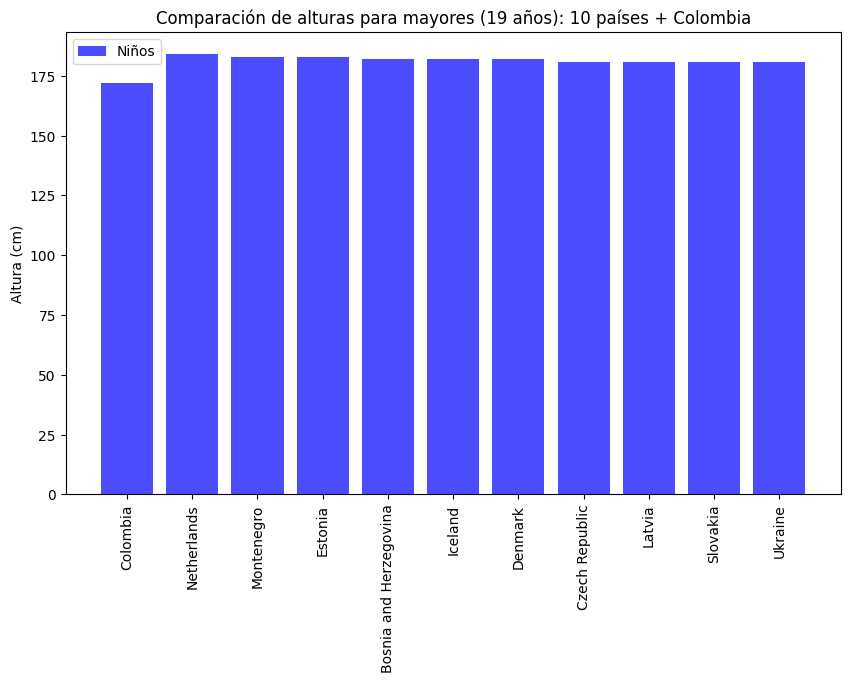

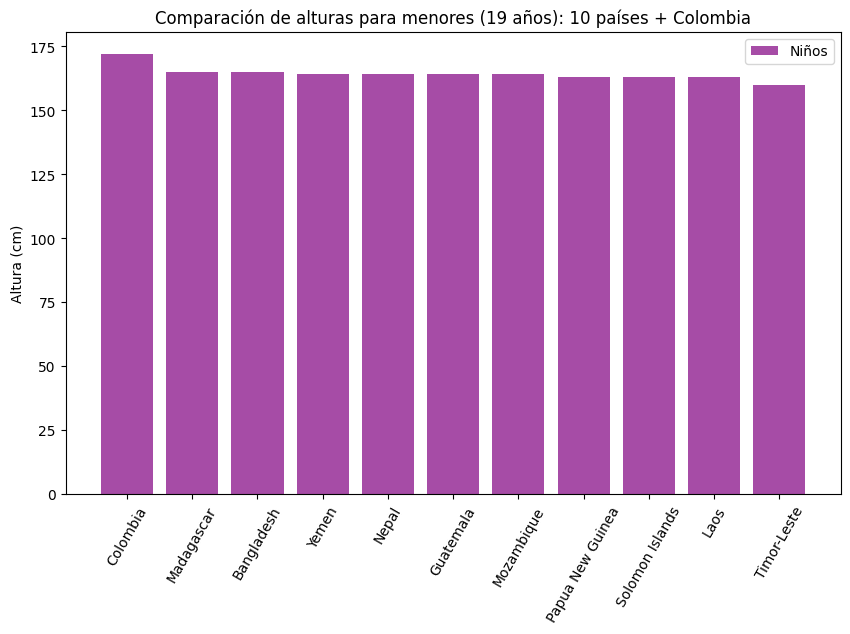

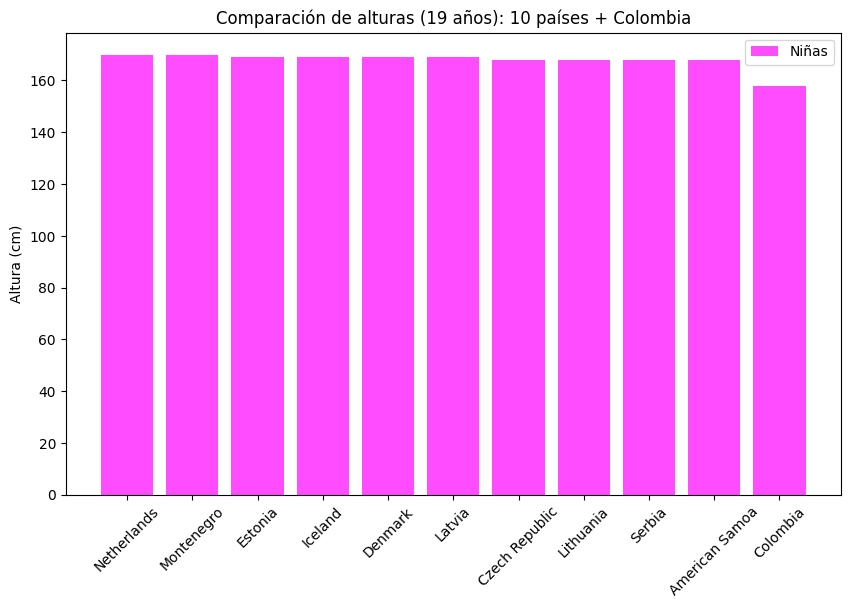

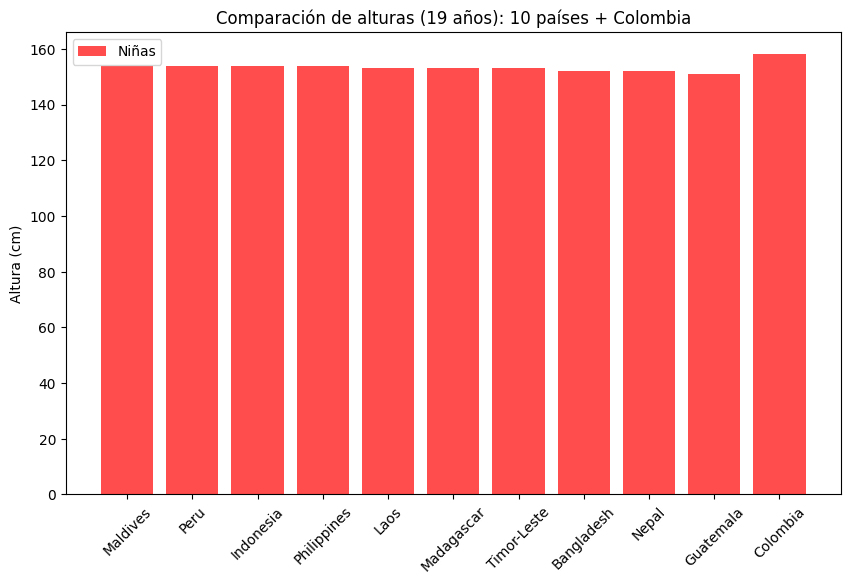

In [ ]:
#b
#Hombres
menores_hombres = alt.tail(10) #Tomamos los 10 menores
mayores_hombres = alt.head(10) #Tomamos los 10 mayores

colombia = alt.loc[alturas['Country'] == 'Colombia'] #Agregamos a Colombia
#Para hombres mayores
datos_mayores_hombres = pd.concat([colombia, mayores_hombres])

plt.figure(figsize=(10, 6))
plt.bar(datos_mayores_hombres['País'], datos_mayores_hombres['Altura promedio, Niños 19 años (cm)'], label='Niños', color='blue', alpha=0.7)
plt.xticks(rotation=90)
plt.ylabel('Altura (cm)')
plt.title('Comparación de alturas para mayores (19 años): 10 países + Colombia')
plt.legend()
plt.show()

#Para hombres menores
datos_menores_hombres = pd.concat([ colombia, menores_hombres])
plt.figure(figsize=(10, 6))
plt.bar(datos_menores_hombres['País'], datos_menores_hombres['Altura promedio, Niños 19 años (cm)'], label='Niños', color= 'purple', alpha=0.7)
plt.xticks(rotation=60)
plt.ylabel('Altura (cm)')
plt.title('Comparación de alturas para menores (19 años): 10 países + Colombia')
plt.legend()
plt.show()

#Mujeres

mujeres = alt.sort_values(by='Niñas 19 años (cm)', ascending=False)
menores_mujeres = mujeres.tail(10)
mayores_mujeres = mujeres.head(10)

#Para mujeres mayores
datos_mayores_mujeres = pd.concat([mayores_mujeres, colombia])
plt.figure(figsize=(10, 6))
plt.bar(datos_mayores_mujeres['País'], datos_mayores_mujeres['Niñas 19 años (cm)'], label='Niñas', color = 'magenta', alpha=0.7)

plt.xticks(rotation=45)
plt.ylabel('Altura (cm)')
plt.title('Comparación de alturas (19 años): 10 países + Colombia')
plt.legend()
plt.show()

#Para mujeres menores
datos_menores_mujeres = pd.concat([menores_mujeres, colombia])
plt.figure(figsize=(10, 6))
plt.bar(datos_menores_mujeres['País'], datos_menores_mujeres['Niñas 19 años (cm)'], label='Niñas', color = 'red', alpha=0.7)

plt.xticks(rotation=45)
plt.ylabel('Altura (cm)')
plt.title('Comparación de alturas (19 años): 10 países + Colombia')
plt.legend()
plt.show()

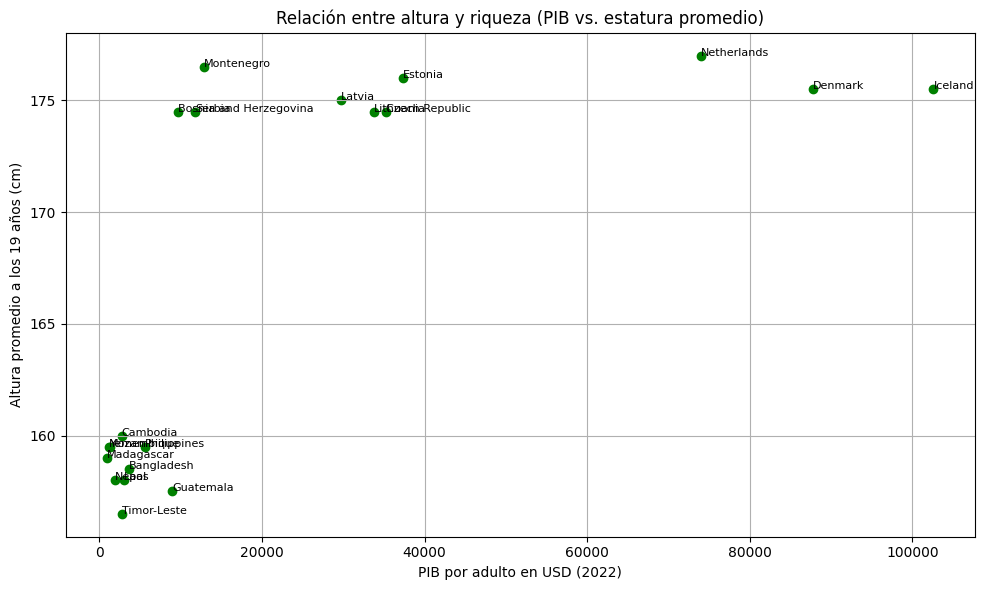

In [ ]:
#c
# Calcular altura promedio a los 19 años
merged_df['Altura promedio 19'] = (merged_df['Altura promedio, Niños 19 años (cm)'] + merged_df['Niñas 19 años (cm)']) / 2

# Ordenar por altura y tomar los 10 más altos y los 10 más bajos
top10_altos = merged_df.sort_values('Altura promedio 19', ascending=False).head(10)
bottom10_bajos = merged_df.sort_values('Altura promedio 19').head(10)

# Unimos ambos
comparacion = pd.concat([top10_altos, bottom10_bajos])

# Gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(comparacion['GDP per Adult 2022'], comparacion['Altura promedio 19'], color='green')

for _, fila in comparacion.iterrows(): # Recorremos cada fila del DataFrame 'comparacion' para acceder a los datos de cada país
    plt.text(fila['GDP per Adult 2022'], fila['Altura promedio 19'], fila['País'], fontsize=8)

plt.xlabel('PIB por adulto en USD (2022)')
plt.ylabel('Altura promedio a los 19 años (cm)')
plt.title('Relación entre altura y riqueza (PIB vs. estatura promedio)')
plt.grid(True)
plt.tight_layout()
plt.show()

#En la gráfica podemos ver que si existe cierta relación entre la riqueza de un país y su estatura promedio